# Learning matplot lib

In [3]:
import matplotlib.pyplot as plt # plotting.
%matplotlib inline  # helps in showing plots on the browser.

UsageError: unrecognized arguments: # helps in showing plots on the browser.


## scatter plot

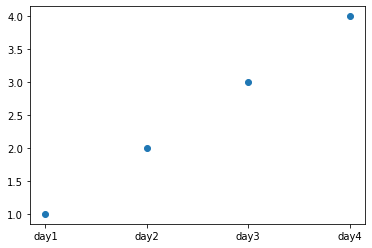

In [8]:
x_days  = ["day1", "day2", "day3", "day4"]
y_temp  = [1, 2, 3, 4]
y2_temp  = [8,9,10,11]
plt.scatter(x_days,y_temp  )

## parameters in scatter plot

In [ ]:
# colour  - alows to change colour
# s       - allows to change size
# marker  = style of marker
# apha    - transparency 
# etc     - check others online 

## line plot

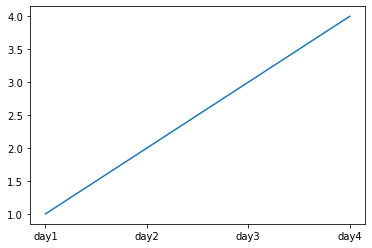

In [11]:
plt.plot(x_days,y_temp)

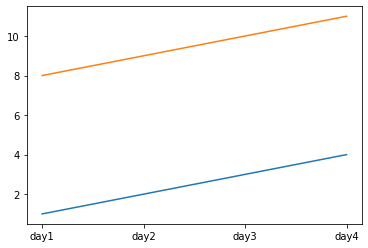

In [10]:
plt.plot(x_days,y_temp)
plt.plot(x_days,y2_temp)


## parameters in line plot

In [ ]:
# colour  - alows to change colour
# fmt       - allows to format string
# linestyles  - 
### line plot linewidth   - 
# marker  = style of marker
# apha    - transparency 
# etc     - check others online 

## pie chart

([<matplotlib.patches.Wedge at 0x19c821a0a60>,
 [Text(1.0461621663333946, 0.3399186987098808, 'day1'),
  Text(0.33991867422268784, 1.0461621742897658, 'day2'),
  Text(-1.0461621902025062, 0.3399186252483017, 'day3'),
  Text(0.3399188211458418, -1.0461621265515308, 'day4')])

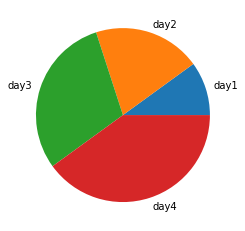

In [14]:
plt.pie(y_temp,labels=x_days)

## parameters in pie chart

In [ ]:
# colour  - alows to change colour
# lables      - allows us to label string to numbers## pie chart
# explode  - 
# shadow   - 
# radius  = style of marker 
# etc     - check others online 

## bar chart

<BarContainer object of 4 artists>

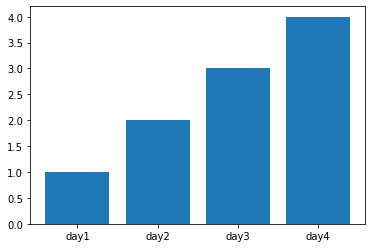

In [15]:
plt.bar(x_days,y_temp)

<BarContainer object of 4 artists>

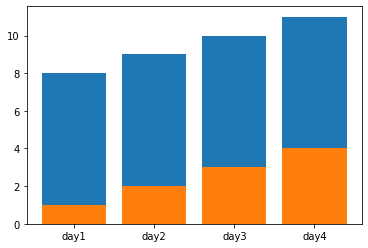

In [17]:
plt.bar(x_days,y2_temp)
plt.bar(x_days,y_temp)



In [18]:
# check parameters online

In [21]:
ax1 = plt.subplot2gird(
(3,3),(0,0))
ax2 = plt.subplot2gird(
(3,3),(1,1))
plt.bar(ax1,ax2)

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot2gird'